## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df =  pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
total_mice = len(data_df["Mouse ID"].unique())
total_mice



249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = pd.DataFrame(duplicate_mice)
duplicate_mouse


,0
0,g989


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]


In [32]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(clean_df["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": regimen_mean, 
                           "Median": regimen_median, 
                           "Variance": regimen_variance, 
                           "Std": regimen_std,
                          "Sem": regimen_sem})
summary_df

,Mean,Median,Variance,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

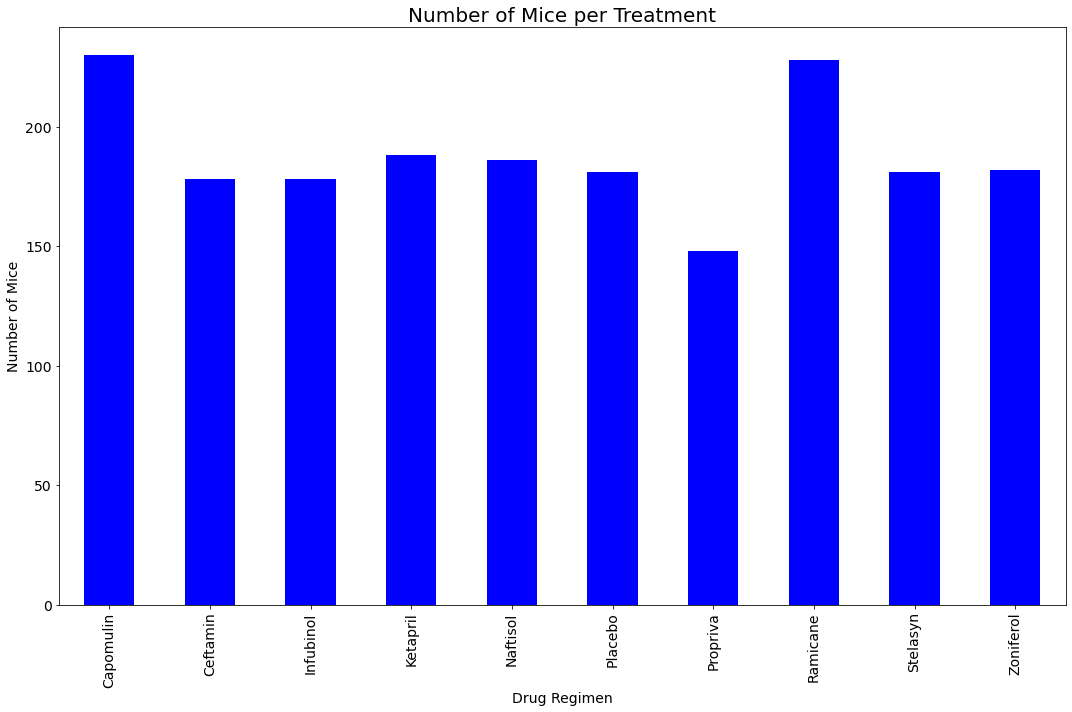

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_mice_per = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = count_mice_per.plot.bar(figsize=(15,10), color='b',fontsize =14)
count_mice_per
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_mice_per

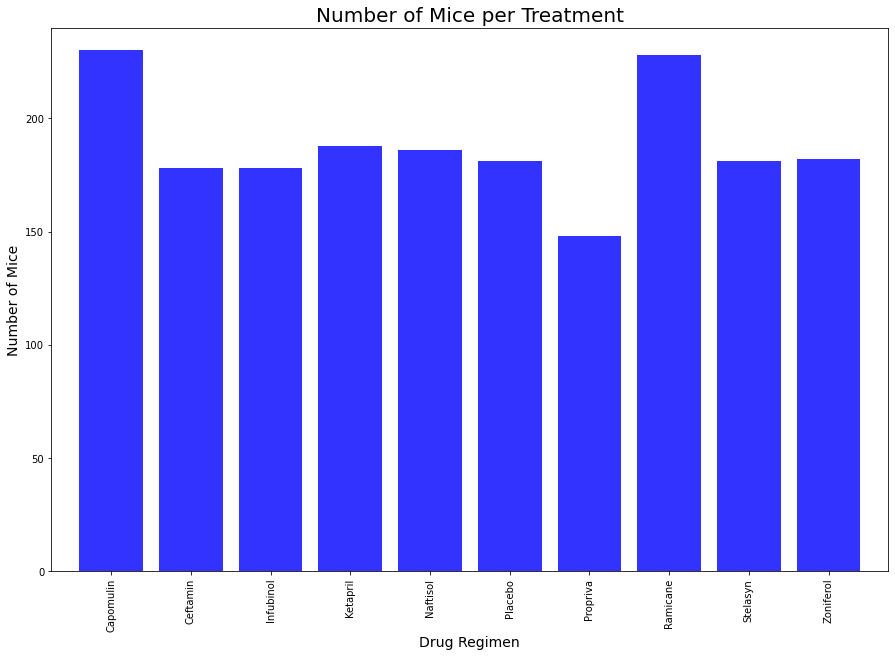

In [51]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist() 
mice_list

x_axis = np.arange(len(count_mice_per)) 
fig1, ax1 = plt.subplots(figsize=(15,10)) 
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 
                            'Ceftamin', 
                            'Infubinol', 
                            'Ketapril', 
                            'Naftisol', 
                            'Placebo', 
                            'Propriva', 
                            'Ramicane', 
                            'Stelasyn', 
                            'Zoniferol'], rotation='vertical') 

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment", fontsize = 20) 
plt.xlabel("Drug Regimen",fontsize = 14) 
plt.ylabel("Number of Mice",fontsize = 14)

plt.savefig("../images/mat_mice_per_treat.png", bbox_inches = "tight")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())




In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
